#### [**Mathematical Modeling of Unsteady Inviscid Flows**](https://www.springer.com/gp/book/9783030183189)
**by Jeff D. Eldredge** (Springer, 2019)

This Jupyter notebook and associated code serve as a companion to the book. The notebook is powered by the [`PotentialFlow`](https://github.com/darwindarak/PotentialFlow.jl) package, written in the [Julia language](https://julialang.org/) by Darwin Darakananda and Jeff D. Eldredge. *The code is released under the [MIT license](https://opensource.org/licenses/MIT).*
<hr />

<!--NAVIGATION-->
< [Potential flows in the plane](3.2-PotentialFlowsInPlane.ipynb) | [Contents](Index.ipynb) | [Next notebook](Index.ipynb) >

<a id='top'></a>
## Corner and wedge flows

In this notebook we will generate flows in which there are a few stagnation streamlines in the form of straight rays emanating from the center. These flows are called corner (or wedge) flows, and they have a complex potential of the form

$$F(z) = Az^\delta$$

where $A$ is a complex constant and $\delta$ a positive real-valued constant. First, we will investigate a few basic aspects of this mathematical form.

Before we start, it is slightly more informative to write the complex potential in the form given by equation (3.93):

$$F(z) = \nu S L^{1-1/\nu} z^{1/\nu}$$

Here, $L$ is a characteristic length scale of the flow, $S$ is the complex strength of the flow, and $\nu$ is a parameter between $0$ and $2$ that defines the *interior angle* of the corner, given by $\pi \nu$.

We will set $L = 1$ throughout these examples, for simplicity.

In [1]:
L = 1;

#### The usual preparatory steps.

In [2]:
using PotentialFlow
using Plots
pyplot()

Plots.PyPlotBackend()

In [3]:
nx = 201; ny = 201
xmin = -2; xmax = 2
ymin = -2; ymax = 2
x = range(xmin,xmax,length=nx)
y = range(ymin,ymax,length=ny)

# Output grid of complex coordinates.
Z = [xi + im*yi for xi in x, yi in y]

# Initialize complex potential.
F = zeros(ComplexF64,nx,ny);

#### An example of a right-angled corner

Before we get too far along, let us first set $\nu = 1/2$, which should give an interior angle of $\pi/2$ (90 degrees). We will set the complex strength to $S = 1$.

In [4]:
# strength.
S = 1.0

# factor on interior angle of the corner (νπ)
ν = 1/2;

Evaluate the complex potential

In [5]:
F .= ν*S*L^(1-1/ν).*Z.^(1/ν);

and plot the streamlines

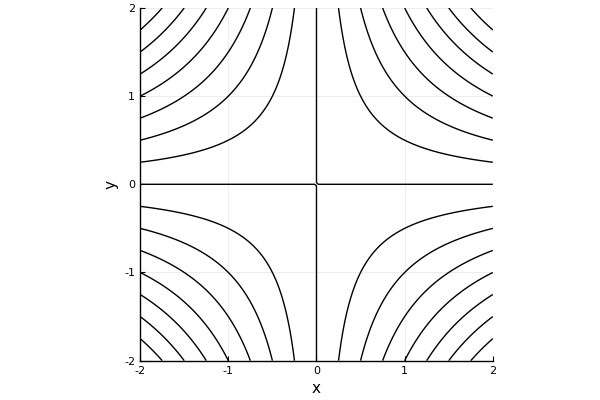

In [6]:
contour(x,y,imag.(F)',ratio=1,legend=:false,color=:black,xlabel="x",ylabel="y",
    xlim=(xmin,xmax),ylim=(ymin,ymax))

This is indeed a basic corner flow, established between any two of the straight stagnation streamlines that intersect at the center.

<a id='branch'></a>
#### Multi-valuedness and the branch cut.

The choice $\nu=1/2$ in the previous example was special because the plane is neatly divided into 90-degree corners. This would also be true for any choice in which $\nu = 1/n$, where $n$ is a positive integer. For example, $\nu = 1/5$. (For the next few examples we will just set the constant factor in front of the $z^{1/\nu}$ to 1.)

In [7]:
# factor on interior angle of the corner (νπ).
ν = 1/5;

F .= Z.^(1/ν);

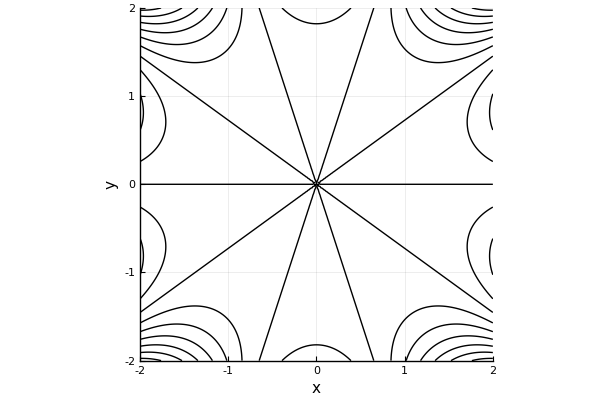

In [8]:
contour(x,y,imag.(F)',ratio=1,legend=:false,color=:black,xlabel="x",ylabel="y",
    xlim=(xmin,xmax),ylim=(ymin,ymax))

However, for any other choice of $\nu$ in the range between $0$ and $2$, the function is multi-valued, similar to the way that $\log z$ was multi-valued in the case of the monopole source in the [previous notebook](3.2-PotentialFlowsInPlane.ipynb). Let us see what this looks like for an arbitrary choice of $\nu$:

In [9]:
# factor on interior angle of the corner (νπ).
ν = 0.6;

F .= Z.^(1/ν);

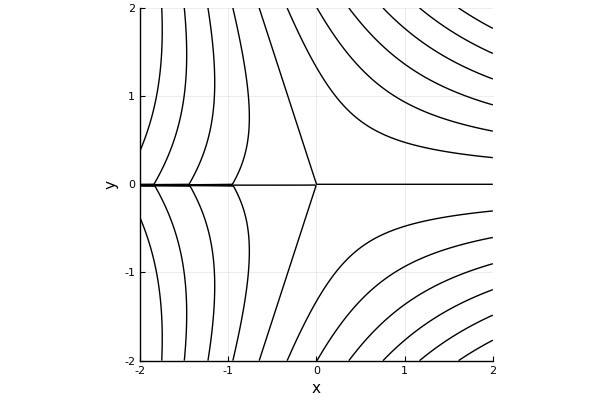

In [10]:
contour(x,y,imag.(F)',ratio=1,legend=:false,color=:black,xlabel="x",ylabel="y",
    xlim=(xmin,xmax),ylim=(ymin,ymax))

Here, we see the necessary artifact of a multi-valued function: a **branch cut**, here aligned with the negative $x$ axis. This branch cut reconciles the value of $F$ on either side.

Let's see the effect of this branch cut by evaluating the potential on either side of the branch cut:

In [11]:
# set up two evaluation points
z = zeros(ComplexF64,2)

# Here is an evaluation point just above the branch cut
z[1] = exp(im*(π-0.001))

# Here is an evaluation point just below the branch cut
z[2] = exp(im*(-π+0.001));

Plot them to see where they lie:

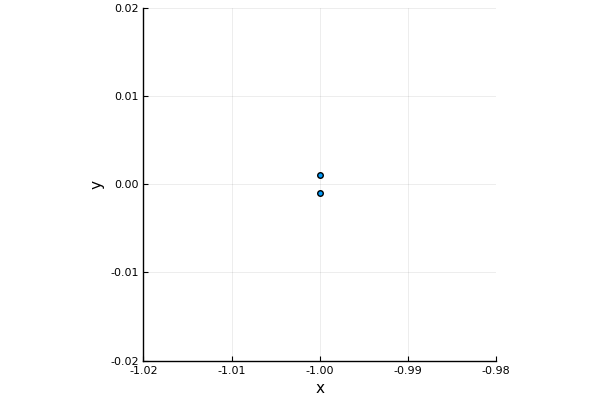

In [12]:
scatter(real.(z),imag.(z),
    xlims=(-1.02,-0.98),ylims=(-0.02,0.02),legend=:false,ratio=1,
    xlabel="x",ylabel="y")

They are very close to each other. Let's evaluate the complex potential at these two points:

In [13]:
z.^(1/ν)

2-element Array{Complex{Float64},1}:
 0.49855593055097147 - 0.8668575339191873im
 0.49855593055097147 + 0.8668575339191873im

The results of this evaluation show that their imaginary parts (the streamfunction) are equal but opposite sign.

It is important to remember that, as discussed in Note 3.2.2 of the book, we can place the branch cuts where we like. How do we do this in practice? A footnote on Page 444 of the book gives us one trick: To rotate a branch cut from angle $-\pi$ to a new angle $\tau$, we multiply $z$ by $\exp(-i(\tau+\pi))$ and its inverse. This seemingly benign set of operations has the effect of redefining the orientation of the coordinate system before $z$ is raised to a power. Once the power is computed, the coordinate system is rotated back, but leaving the branch cut along a different ray. Let's see this in action:

In [14]:
# factor on interior angle of the corner (νπ).
ν = 0.6;

# desired angle of branch cut
τ = -π/2

# rotation factor
rot = exp(-im*(τ+π))

# inverse factor
invrot = exp(im*(τ+π)/ν)

F .= (Z.*rot).^(1/ν).*invrot;

Plot it to check that it worked:

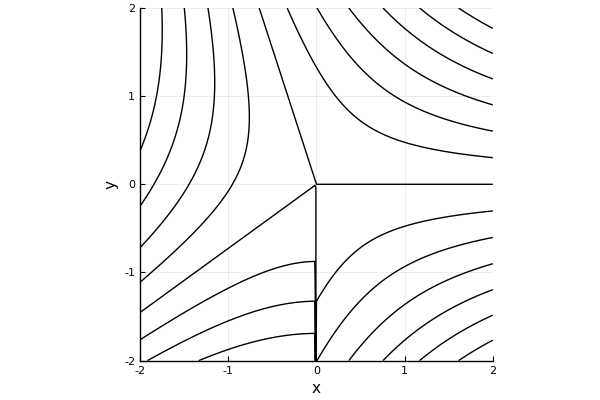

In [15]:
contour(x,y,imag.(F)',ratio=1,legend=:false,color=:black,xlabel="x",ylabel="y",
    xlim=(xmin,xmax),ylim=(ymin,ymax))

This useful trick can be used to place the branch cut in some innocuous location where it won't interfere with the region where we wish to inspect streamlines. Indeed, as discussed in equation (3.98), we can place the branch cut along a ray that is opposite to the bisector of the corner region (at angle $\bar{\theta}_0 = \nu(m\pi + \pi/2)$). Thus, the angle of the branch cut is $\beta = \bar{\theta}_0-\pi$, where $m = 0,1,\ldots$ defines the choice of corner. In fact, this means that the form of $F$ with the branch cut set in this manner is

$$ F(z) = \left(z e^{-i\bar{\theta}_0}\right)^{1/\nu} e^{i\bar{\theta}_0/\nu} = i (-1)^m \left(z e^{-i\bar{\theta}_0}\right)^{1/\nu}$$

or, briefly,

$$ F(z) = i (-1)^m \left(z n_0^{*}\right)^{1/\nu} $$

where $n_0 = e^{i\bar{\theta}_0}$ is the bisector normal vector, and $()^*$ denotes the complex conjugate.

Try changing $m$ to different integer values in the following example:

In [206]:
# factor on interior angle of the corner (νπ).
ν = 0.6

# choice of the corner of interest (m = 0, 1, 2, etc).
m = 0

# angle of bisector of corner of interest
θ̄₀ = ν*(m*π + π/2)

# bisector normal
n₀ = exp(im*θ̄₀)

F .= im*(-1)^m.*(Z.*n₀').^(1/ν);

Inspect the result:

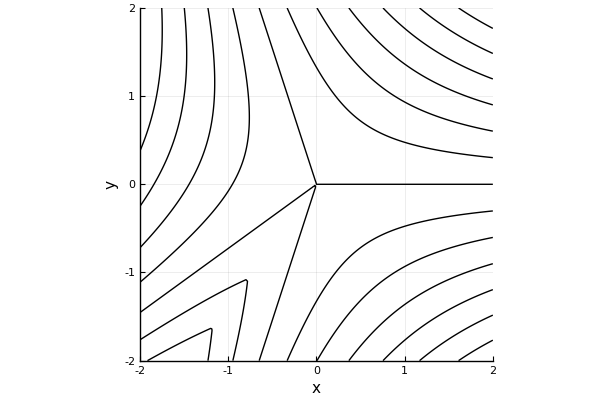

In [207]:
contour(x,y,imag.(F)',ratio=1,legend=:false,color=:black,xlabel="x",ylabel="y",
    xlim=(xmin,xmax),ylim=(ymin,ymax))

#### Complex strength and flow orientation

Until now, we have assumed that the factor in the potential was 1. What happens if we make the coefficient factor a complex constant?

In [208]:
# factor on interior angle of the corner (νπ).
ν = 0.6

# strength, now complex.
S = exp(im*π*0.2)

# choice of the corner of interest (m = 0, 1, 2, etc).
m = 0

# angle of bisector of corner of interest
θ̄₀ = ν*(m*π + π/2)

# bisector normal
n₀ = exp(im*θ̄₀)

F .= im*ν*S*L^(1-1/ν)*(-1)^m.*(Z.*n₀').^(1/ν);

Plot it...

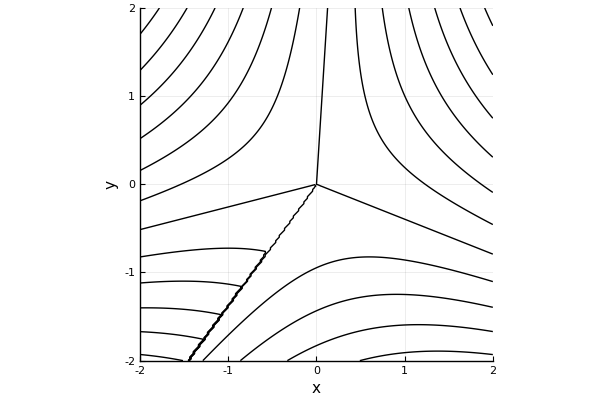

In [209]:
contour(x,y,imag.(F)',ratio=1,legend=:false,color=:black,xlabel="x",ylabel="y",
    xlim=(xmin,xmax),ylim=(ymin,ymax))

The complex $S$ seems to have rotated the flow, but kept the flow otherwise intact. (It also kept the branch cut at the same place, as we would expect.) Let's explore this rotation further.

In fact, the form given above tells us everything we need to know, since we can choose the orientation of the bisector normal, $n_0$, at some desired angle. The directionality of the flow is determined by the factor $(-1)^m$, which we can combine with a magnitude of the flow into a real-valued constant, $\sigma$ (called the *signed intensity* (3.103)).

The complex strength $S$ in (3.93) thus takes the form (3.106)

$$S = i \sigma n_0^{-1/\nu}$$ 

Let us define a positive corner flow as one with positive $\sigma$. Now we will set the signed intensity ($\sigma$) and the orientation (via $\bar{\theta}$) separately. The complex potential (with branch cut set opposite the bisector normal) is thus

$$F(z) = i\sigma (z n_0^*)^{1/\nu}$$

[Return to top of notebook](#top)

#### A convenience function.

To make the plotting a little bit simpler for the remainder of this notebook, let's define a function that automates everything we have done, and focuses attention on a single corner by blocking out the rest of the plane.

In [212]:
const mygreen = RGBA{Float64}(151/255,180/255,118/255,1)

function corner(ν::Real,σ::Real,θ̄₀::Real;radius=2.0)
    
    xmin = -radius; xmax = radius
    ymin = -radius; ymax = radius
    
    nx = 201; ny = 201
    x = range(xmin,xmax,length=nx)
    y = range(ymin,ymax,length=ny)

    # Output grid of complex coordinates.
    Z = [xi + im*yi for xi in x, yi in y]

    # Initialize complex potential.
    F = zeros(ComplexF64,nx,ny);

    fact = 1
    L = 1
    
    θ0 = θ̄₀ - 0.5*fact*π*ν
    θ1 = θ̄₀ + 0.5*fact*π*ν
    θ = range(θ1-2π,θ0,length=197)
    xv = [0;2*radius*cos.(θ);0]
    yv = [0;2*radius*sin.(θ);0]
    
    # bisector normal
    n₀ = exp(im*θ̄₀)
    
    F .= im*ν*σ*L^(1-1/ν).*(Z.*n₀').^(1/ν);
    
    ps = contour(x,y,imag.(F)',ratio=1,legend=:false,color=:black,xlabel="x",ylabel="y",
    xlim=(xmin,xmax),ylim=(ymin,ymax))
    ps = plot!(xv,yv,fillcolor=mygreen,fillrange=0,linecolor=:black,ratio=1)
    return ps
end

corner (generic function with 3 methods)

Let's use the new function to plot the corner flow again, this time focusing on a specific corner:

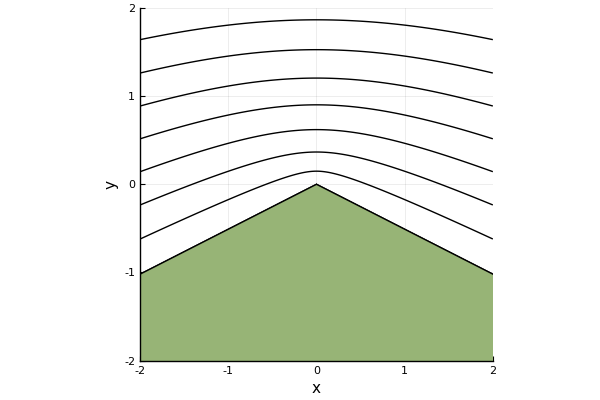

In [223]:
# signed intensity
σ = 1.0

# factor on interior angle of the corner (νπ).
ν = 1.3;

# angle of bisector
θ̄ = π/2

# apply the function.
corner(ν,σ,θ̄)

[Return to top of notebook](#top)

<!--NAVIGATION-->
< [Potential flows in the plane](3.2-PotentialFlowsInPlane.ipynb) | [Contents](Index.ipynb) | [Next notebook](Index.ipynb) >